In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RANSACRegressor, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_squared_error,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout


!pip install pmdarima
from pmdarima import auto_arima

import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


# Download dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/S3_MLDM/PROJET_BIG_DATA/data/data/timeseries/2015/'

data_external = pd.read_csv(file_path+"external.csv")
data_actor = pd.read_csv(file_path+"by_actor.csv")
data_global = pd.read_csv(file_path+"global.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_external

,week,weekday,year,month,day,PriceUSD,HashRate
0,0,0,2015,1,2,315.942732,333345.017260
1,0,1,2015,1,3,285.647310,327284.198765
2,0,2,2015,1,4,263.334575,347486.927083
3,0,3,2015,1,5,275.003852,315162.561773
4,0,4,2015,1,6,287.549521,319203.107437
...,...,...,...,...,...,...,...
359,51,2,2015,12,27,422.705895,952298.517472
360,51,3,2015,12,28,421.052880,701449.151894
361,51,4,2015,12,29,431.340021,738612.020869
362,51,5,2015,12,30,426.043647,766484.172600


In [ ]:
data_global

,week,weekday,year,month,day,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,...,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self,xxxx,original order
0,0,0,2015,1,2,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,...,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762,xxxx,1
1,0,1,2015,1,3,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,...,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021,xxxx,2
2,0,2,2015,1,4,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,...,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407,xxxx,3
3,0,3,2015,1,5,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,...,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197,xxxx,4
4,0,4,2015,1,6,1296373032,118260758863552,117868258863552,14667.176159,4.217540e+06,...,2.869595,2.857591,157,393796373032,392500000000,4026430543611,118260758863552,114234328319941,xxxx,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,51,2,2015,12,27,2690278918,144400809619459,143895809619459,16939.062958,7.160242e+06,...,2.791413,3.109759,202,507690278918,505000000000,8822286839510,144400809619459,135578522779949,xxxx,360
360,51,3,2015,12,28,3086796538,211351110168175,210971110168175,17842.548283,7.512657e+06,...,2.717917,2.755783,152,383086796538,380000000000,20454787219133,211351110168175,190896322949042,xxxx,361
361,51,4,2015,12,29,3166502821,218514700541035,218107200541035,17110.312222,7.380363e+06,...,2.777574,2.601867,163,410666502821,407500000000,13007403909109,218514700541035,205507296631926,xxxx,362
362,51,5,2015,12,30,3125912067,232187937416504,231775437416504,17407.472543,7.416343e+06,...,2.598141,2.760532,165,415625912067,412500000000,11059785184697,232187937416504,221128152231807,xxxx,363


In [ ]:
data_actor

,week,weekday,year,month,day,identity,received,nb_received,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,0,0,2015,1,2,0,34012156723,8395,15588104,1.882565,962,34009374770,0,0,2068,34009374770
1,0,0,2015,1,2,35,50000000,1,42966,0.200418,3,21707034,0,0,6,21707034
2,0,0,2015,1,2,57,54120689613,230,880706,1.752309,86,22815001320,0,0,179,22815001320
3,0,0,2015,1,2,61,1561500012,79,120000,0.052651,10,1002920134,0,0,20,1002920134
4,0,0,2015,1,2,107,31639115343,66,280000,0.016400,31,29063152655,0,0,59,29063152655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35945,51,6,2015,12,31,SlushPool.com,12680581415,6,269760,0.001651,5,18049475882,0,0,755,18049475882
35946,51,6,2015,12,31,TheRockTrading.com,5294843075,29,20000,0.019769,1,101126679,0,0,2,101126679
35947,51,6,2015,12,31,Vaultoro.com,120315254,27,85560,0.708386,8,221019974,5014389,5014389,15,216005585
35948,51,6,2015,12,31,Xapo.com,2057125690583,6169,18940000,0.025285,1243,3163066490352,1011864383684,3113357167044,4811,49709323308


In [ ]:
data_global.drop(columns=["xxxx","year","day", "month", "original order"], inplace=True)
data_actor.drop(columns=["year","day","identity", "month"], inplace=True)
data_external.drop(columns=["year","day", "month"], inplace=True)

#Creating new column

In [ ]:
dataframe_external_global = pd.merge(data_external, data_global, on=['week', 'weekday'])


In [ ]:
data_actor_grouped=data_actor.groupby(['week', 'weekday']).agg(['mean', 'std', 'min', max])
data_actor_grouped.columns = [f'{col}_{agg}' for col, agg in data_actor_grouped.columns]

def ajouter_sufixe_aux_colonnes(df, sufixe, colonnes_a_exclure=[]):
    nouvelles_colonnes = {colonne: colonne + sufixe if colonne not in colonnes_a_exclure else colonne for colonne in df.columns}
    df.rename(columns=nouvelles_colonnes, inplace=True)
    return df

data_actor_grouped = ajouter_sufixe_aux_colonnes(data_actor_grouped, '_best100', colonnes_a_exclure=['week', 'weekday'])

# Merging the three dataset

In [ ]:
dataframe_external_global_actor = pd.merge(dataframe_external_global, data_actor_grouped, on=['week', 'weekday'])
dataframe_external_global_actor.drop(columns=['week', 'weekday'], inplace=True)

#Null Analysis

In [ ]:
dataframe_external_global_actor.columns[dataframe_external_global_actor.isna().all()]

Index([], dtype='object')

In [ ]:
def plot_null_values(dataframe):

    null_counts = (dataframe == 0).sum()
    null_info = pd.DataFrame({'Colonne': null_counts.index, 'Nombre de 0': null_counts.values})
    fig = px.bar(null_info, x='Colonne', y='Nombre de 0', title='Nombre de valeurs nulles par colonne')

    fig.show()


In [ ]:
plot_null_values(dataframe_external_global_actor)

In [ ]:
dataframe_external_global_actor.drop(columns=['self_spent_min_best100', 'self_spent_estimated_min_best100'], inplace=True)

#Feature correlations

In [ ]:
def find_high_correlation_pairs(df, threshold=0.9):
    corr_matrix = df.corr()
    corr_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= threshold :
                corr_pairs.append(((corr_matrix.columns[i], corr_matrix.columns[j]), corr_matrix.iloc[i, j]))

    dataframe_external_global_actor.corr()
    return (corr_pairs)

def correlation_matrix(df) :
  corr_matrix_ = df.corr()
  fig = px.imshow(corr_matrix_, x=corr_matrix_.columns, y=corr_matrix_.columns, zmin=-1, zmax=1, color_continuous_scale='RdBu')

  fig.update_layout(
      title="Correlation matrix",
      xaxis_title="Variables",
      yaxis_title="Variables",
  )

  fig.show()

correlation_matrix(dataframe_external_global_actor)
find_high_correlation_pairs(dataframe_external_global_actor, threshold=1)

[(('total_received_satoshi', 'total_received'), 1.0),
 (('nb_mining', 'newly_created_coins'), 1.0000000000000007)]

In [ ]:
dataframe_external_global_actor.drop(columns=['total_received_satoshi', 'newly_created_coins'], inplace=True)

In [ ]:
dataframe_external_global_actor

,PriceUSD,HashRate,total_fee,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,nb_transactions,nb_payments,mean_nb_inputs,...,self_spent_estimated_std_best100,self_spent_estimated_max_best100,nb_spent_mean_best100,nb_spent_std_best100,nb_spent_min_best100,nb_spent_max_best100,spent_mean_best100,spent_std_best100,spent_min_best100,spent_max_best100
0,315.942732,333345.017260,1159934218,72955568521080,14978.682808,4.732406e+06,0.778933,77439,257633,2.715557,...,3.526190e+11,3310132670953,646.066667,4429.057545,0,41870,3.211228e+10,1.448712e+11,0,1317446006606
1,285.647310,327284.198765,1196476043,82220189454578,14304.385766,4.086009e+06,0.797419,83644,295618,2.781885,...,4.056802e+11,3536510330402,489.066667,2677.977754,0,24355,4.286031e+10,1.739907e+11,0,1431051305400
2,263.334575,347486.927083,2159195328,114726942449532,25138.199015,6.619757e+06,0.899054,85893,280288,2.770133,...,4.485307e+11,3061962509963,475.747253,2534.775075,0,23306,5.388115e+10,2.260541e+11,0,1831743101158
3,275.003852,315162.561773,1608443040,112051728285641,16955.609622,4.662858e+06,0.898594,94862,286552,2.954471,...,3.754550e+11,3214106851982,760.053763,4604.691425,0,41958,4.951750e+10,1.809094e+11,0,1390744723871
4,287.549521,319203.107437,1296373032,117868258863552,14667.176159,4.217540e+06,0.741385,88386,252571,2.869595,...,2.775687e+11,1929884618579,411.378947,1962.821304,0,17145,5.182378e+10,2.471176e+11,0,2147831468821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,422.705895,952298.517472,2690278918,143895809619459,16939.062958,7.160242e+06,1.231351,158821,493895,2.791413,...,4.748767e+11,3899206212541,675.585859,2670.012853,2,23035,4.569175e+10,1.581468e+11,2250548,1257706821228
360,421.052880,701449.151894,3086796538,210971110168175,17842.548283,7.512657e+06,0.986469,173002,476756,2.717917,...,1.247242e+12,10833557712083,684.240000,2986.764673,2,28131,5.951298e+10,1.876395e+11,440000,1366027856906
361,431.340021,738612.020869,3166502821,218107200541035,17110.312222,7.380363e+06,0.848256,185064,481512,2.777574,...,6.890527e+11,4828262991165,709.220000,3309.876428,2,31928,6.347590e+10,1.933573e+11,3047684,1430916697531
362,426.043647,766484.172600,3125912067,231775437416504,17407.472543,7.416343e+06,0.816440,179573,495717,2.598141,...,6.531207e+11,5994416046471,660.870000,3043.469587,0,29270,5.989583e+10,1.892630e+11,0,1604612068172


# Selections des variables

In [ ]:
X = dataframe_external_global_actor.iloc[:-6]
y = dataframe_external_global_actor["PriceUSD"].iloc[6:].reset_index(drop=True)
suffix = "_" + str(6)
X = X.add_suffix(suffix)

for i in range(1,6):
    new_X = dataframe_external_global_actor.iloc[i:-6+i]
    suffix = "_" + str(5-i+1)
    new_X = new_X.add_suffix(suffix)
    new_X = new_X.reset_index(drop=True)
    X = pd.concat([X, new_X], axis=1)

In [ ]:
split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Enregistrement des performences

In [ ]:
Performence_dict ={}


def calculate_error(test,pred):
  mse = mean_squared_error(test, pred)
  mae = mean_absolute_error(test, pred)
  r2 = r2_score(test, pred)
  print(f"mean_squared_error: {mse}")
  print(f"mean_absolute_error: {mae}")
  print(f"r2 score: {r2}")
  return mse,mae,r2

def plot_mse_mae_boxplot(y_test, y_pred):
    mse = (y_test - y_pred) ** 2
    mae = np.abs(y_test - y_pred)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Crée un subplot avec deux colonnes

    # Boxplot pour MSE
    axes[0].boxplot(mse)
    axes[0].set_title('Boxplot de MSE')
    axes[0].set_ylabel('MSE')

    # Boxplot pour MAE
    axes[1].boxplot(mae)
    axes[1].set_title('Boxplot de MAE')
    axes[1].set_ylabel('MAE')

    plt.suptitle('Boxplots de MSE et MAE')
    plt.show()

def plot_overlapping_histogram(y_test, y_pred):

    differences_test = np.diff(y_test.ravel())
    differences_pred = np.diff(y_pred.ravel())

    plt.hist(differences_test, bins='auto', alpha=0.5, label='y_test')
    plt.hist(differences_pred, bins='auto', alpha=0.5, label='y_pred')

    plt.title("Histogramme superposé des différences")
    plt.xlabel("Différence")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()

# Stepwise

In [ ]:
def stepwise(X_train, y_train, X_test, y_test, criterion='aic', sl=0.05, verbose=1, method='both'):
    # Prepare the data
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_train["intercept"] = 1
    X_test = pd.get_dummies(X_test, drop_first=True)
    X_test["intercept"] = 1

    def fit_model(X, y):
        return sm.OLS(y, X).fit()

    def calculate_criterion(X, y, model, criterion):
        y_pred = model.predict(X)
        if criterion == 'aic':
            return model.aic
        elif criterion == 'bic':
            return model.bic
        elif criterion == 'r2_adj':
            n = X.shape[0]
            k = X.shape[1]
            r2 = r2_score(y, y_pred)
            return 1-(((1 - r2) * (n - 1)) / (n - k - 1))
        elif criterion == 'r2':
            r2 = r2_score(y, y_pred)
            return r2
        elif criterion == 'mse':
            return mean_squared_error(y, y_pred)
        else:
            raise ValueError("Invalid criterion. Choose 'aic', 'bic', 'r2' or 'r2_adj'")

    if method == 'backward':
        selected_columns = list(X_train.columns)
    else:
        selected_columns = ["intercept"]

    other_columns = list(set(X_train.columns) - set(selected_columns))

    # Initial model fitting and criterion calculation using test data
    current_model = fit_model(X_train[selected_columns], y_train)
    current_criterion_value = calculate_criterion(X_test[selected_columns], y_test, current_model, criterion)

    # Forward Selection
    if method in ['forward', 'both']:
        while other_columns:
            temp_criterion_values = {}
            for column in other_columns:
                temp_model = fit_model(X_train[selected_columns + [column]], y_train)
                n = len(X_test)
                k = len([selected_columns + [column]])
                temp_criterion_value = calculate_criterion(X_test[selected_columns + [column]], y_test, temp_model, criterion)
                temp_criterion_values[column] = temp_criterion_value

            if criterion in ['aic', 'bic', 'mse']:
                best_column = min(temp_criterion_values, key=temp_criterion_values.get)
                if temp_criterion_values[best_column] < current_criterion_value - sl:
                    selected_columns.append(best_column)
                    other_columns.remove(best_column)
                    current_criterion_value = temp_criterion_values[best_column]
                    if verbose:
                        print(f"Added {best_column:<30} with {criterion.upper()}: {current_criterion_value}")
                else:
                    break
            elif criterion in ['r2', 'r2_adj']:
                best_column = max(temp_criterion_values, key=temp_criterion_values.get)
                if temp_criterion_values[best_column] > current_criterion_value + sl:
                    selected_columns.append(best_column)
                    other_columns.remove(best_column)
                    current_criterion_value = temp_criterion_values[best_column]
                    if verbose:
                        print(f"Added {best_column:<30} with {criterion.upper()}: {current_criterion_value}")
                else:
                    break

    # Backward Selection
    if method in ['backward', 'both']:
        while len(selected_columns) > 1:
            temp_criterion_values = {}
            for column in selected_columns:
                if column != "intercept":
                    temp_columns = selected_columns.copy()
                    temp_columns.remove(column)
                    temp_model = fit_model(X_train[temp_columns], y_train)
                    temp_criterion_value = calculate_criterion(X_test[temp_columns], y_test, temp_model, criterion)
                    temp_criterion_values[column] = temp_criterion_value

            if criterion in ['aic', 'bic', 'mse']:
                worst_column = max(temp_criterion_values, key=temp_criterion_values.get)
                if temp_criterion_values[worst_column] < current_criterion_value - sl:
                    selected_columns.remove(worst_column)
                    current_criterion_value = temp_criterion_values[worst_column]
                    if verbose:
                        print(f"Removed {worst_column:<30} with {criterion.upper()}: {current_criterion_value}")
                else:
                    break
            elif criterion in ['r2', 'r2_adj']:
                worst_column = min(temp_criterion_values, key=temp_criterion_values.get)
                if temp_criterion_values[worst_column] > current_criterion_value + sl:
                    selected_columns.remove(worst_column)
                    current_criterion_value = temp_criterion_values[worst_column]
                    if verbose:
                        print(f"Removed {worst_column:<30} with {criterion.upper()}: {current_criterion_value}")
                else:
                    break

    # Final Model Evaluation
    final_model = fit_model(X_train[selected_columns], y_train)
    y_pred_train = final_model.predict(X_train[selected_columns])
    y_pred = final_model.predict(X_test[selected_columns])
    evaluation_result_train = evaluate_model(y_train, y_pred_train)
    evaluation_result = evaluate_model(y_test, y_pred)

    if verbose:
        print('TRAIN :')
        print(evaluation_result_train)
        print('TEST :')
        print(evaluation_result)
        plot_predictions_vs_actual(y_pred, y_test)

    return selected_columns

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    evaluation_result = f'R-squared: {r2}, MSE: {mse}, MAE: {mae}'
    return evaluation_result

def plot_predictions_vs_actual(y_pred, y_test):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, label='Actual Values', linestyle='-', color='blue')
    plt.plot(range(len(y_pred)), y_pred, label='Predicted Values', linestyle='-', color='red')
    plt.title('Predicted vs Actual Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_mse_mae_boxplot(y_test, y_pred):
    mse = (y_test - y_pred) ** 2
    mae = np.abs(y_test - y_pred)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Crée un subplot avec deux colonnes

    # Boxplot pour MSE
    axes[0].boxplot(mse)
    axes[0].set_title('Boxplot de MSE')
    axes[0].set_ylabel('MSE')

    # Boxplot pour MAE
    axes[1].boxplot(mae)
    axes[1].set_title('Boxplot de MAE')
    axes[1].set_ylabel('MAE')

    plt.suptitle('Boxplots de MSE et MAE')
    plt.show()

def plot_overlapping_histogram(y_test, y_pred):

    differences_test = np.diff(y_test.ravel())
    differences_pred = np.diff(y_pred.ravel())

    plt.hist(differences_test, bins='auto', alpha=0.5, label='y_test')
    plt.hist(differences_pred, bins='auto', alpha=0.5, label='y_pred')

    plt.title("Histogramme superposé des différences")
    plt.xlabel("Différence")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()


Added PriceUSD_1                     with R2: 0.8857924225873911
Added total_sent_satoshi_5           with R2: 0.9285091263011561
Added sum_fee_max_best100_1          with R2: 0.9308997487877175
Added HashRate_1                     with R2: 0.932768056903035
Added nb_received_min_best100_5      with R2: 0.9339073456909837
Added sum_fee_min_best100_6          with R2: 0.9349989611418631
Added sum_fee_std_best100_2          with R2: 0.9359829462184345
Added mean_fee_for100_std_best100_3  with R2: 0.9375331129049987
Added received_min_best100_3         with R2: 0.938461031206834
Added received_min_best100_4         with R2: 0.9393594921430761
Added nb_spent_min_best100_4         with R2: 0.9401916579120141
Added nb_spent_min_best100_1         with R2: 0.9409821930973441
Added nb_transactions_1              with R2: 0.9420570350977403
Added nb_transactions_min_best100_1  with R2: 0.9434355362119484
Added PriceUSD_4                     with R2: 0.9440694329688799
Added nb_spent_std_best100_

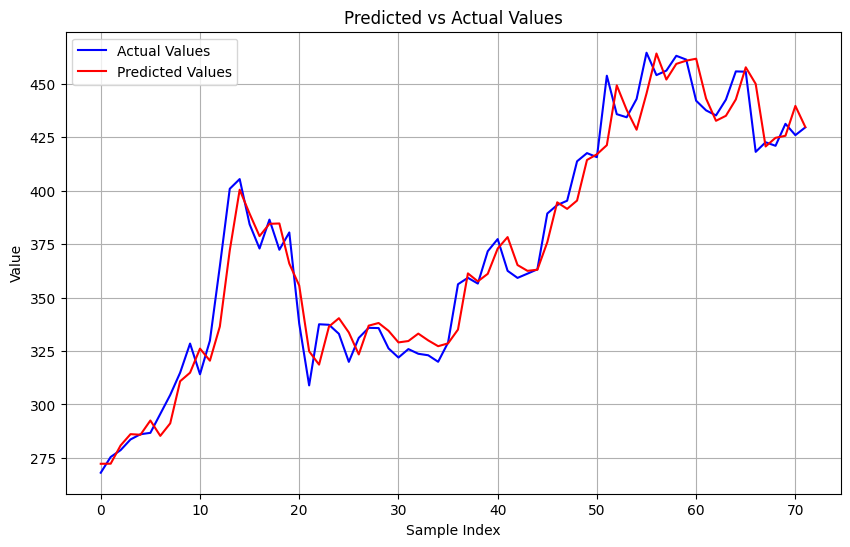

In [ ]:
col = stepwise(X_train, y_train, X_test, y_test, criterion='r2', sl=0, method='both')

R-squared: 0.954440335064038, MSE: 140.62176554150383, MAE: 8.768283193165676


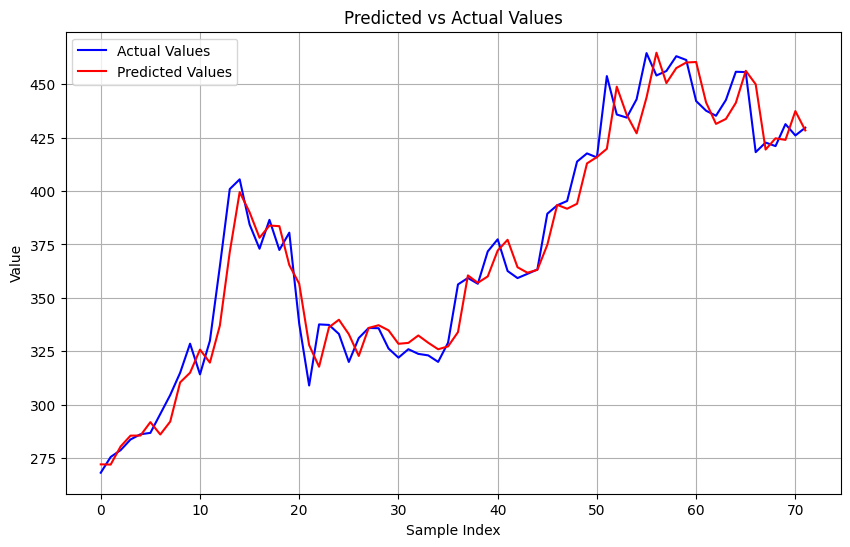

mean_squared_error: 140.62176554150383
mean_absolute_error: 8.768283193165676
r2 score: 0.954440335064038


In [ ]:
col.remove('intercept')
lin_reg = sm.OLS(y_train, X_train[col]).fit()
lin_pred = lin_reg.predict(X_test[col])

print(evaluate_model(y_test, lin_pred))
plot_predictions_vs_actual(lin_pred, y_test)

Performence_dict['Linear Regression'] = calculate_error(y_test, lin_pred)

#Pour comparer sans régression stepwise

R-squared: 0.45714029971752923, MSE: 1675.5586241108685, MAE: 29.51330407298388


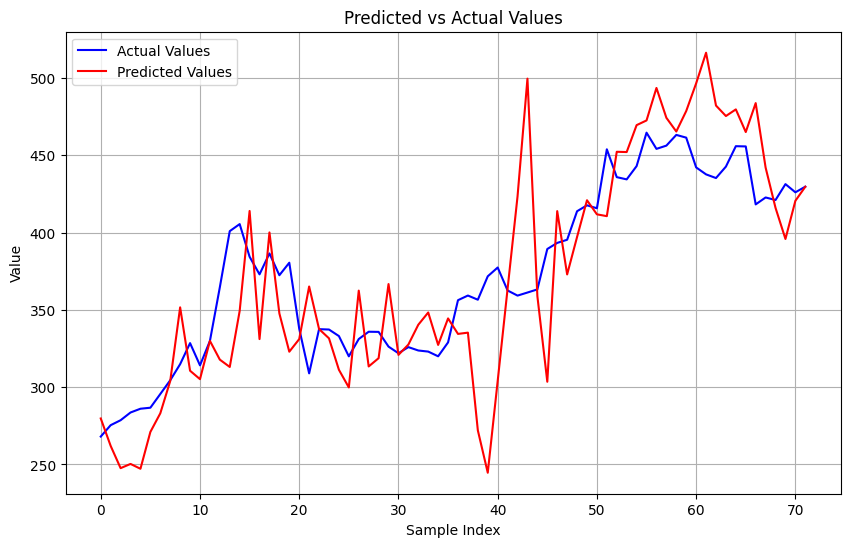

In [ ]:
lin_reg = sm.OLS(y_train, X_train).fit()
lin_pred = lin_reg.predict(X_test)

print(evaluate_model(y_test, lin_pred))
plot_predictions_vs_actual(lin_pred, y_test)

In [ ]:
import re

def nettoyer_liste(liste):
    pattern = re.compile(r"(.*)_([0-9]+)$")
    liste_nettoyee = []
    vus = set()

    for element in liste:
        nouveau_element = pattern.sub(r"\1", element)

        if nouveau_element not in vus:
            vus.add(nouveau_element)
            liste_nettoyee.append(nouveau_element)

    return liste_nettoyee

#liste_resultat.remove('intercept')
liste_resultat = nettoyer_liste(col)

In [ ]:
#col.remove('intercept')
print('Nombre de colonne avant la régression stepwise', X[col].shape[1])
print('Nombre de colonne après la régression stepwise', X.shape[1])

Nombre de colonne avant la régression stepwise 46
Nombre de colonne après la régression stepwise 324


mean_squared_error: 79.20123569467731
mean_absolute_error: 5.61603938543755
r2 score: 0.974339806168209
R-squared: 0.974339806168209, MSE: 79.20123569467731, MAE: 5.61603938543755


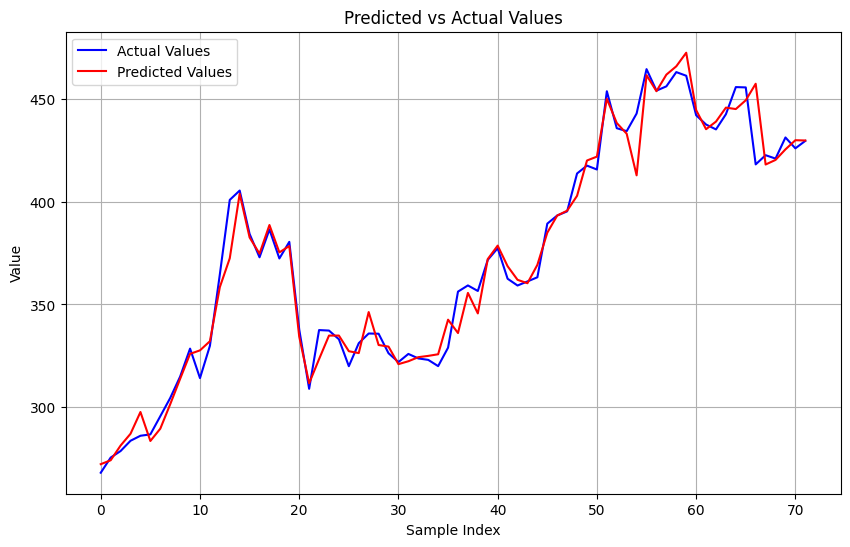

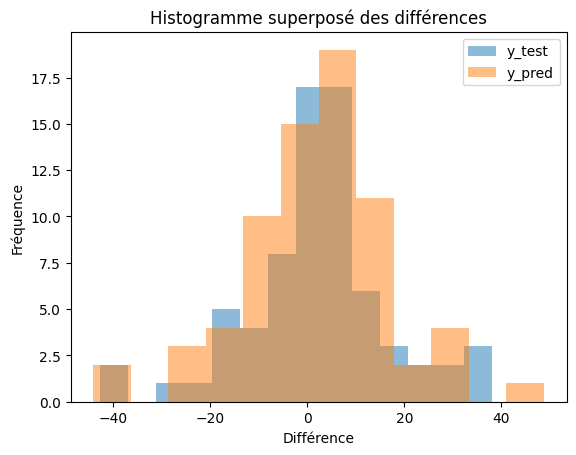

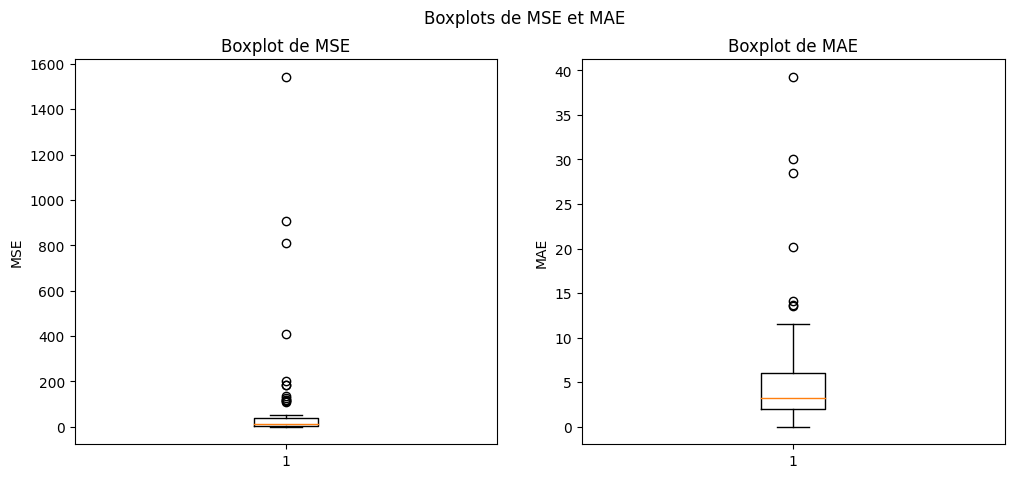

In [ ]:
lin_reg = sm.robust.robust_linear_model.RLM(y_test, X_test[col]).fit()
lin_pred = lin_reg.predict(X_test[col])

Performence_dict['Robust Linear Regression'] = calculate_error(y_test, lin_pred)
print(evaluate_model(y_test, lin_pred))
plot_predictions_vs_actual(lin_pred, y_test)
plot_overlapping_histogram(y_test, lin_pred)
plot_mse_mae_boxplot(y_test, lin_pred)

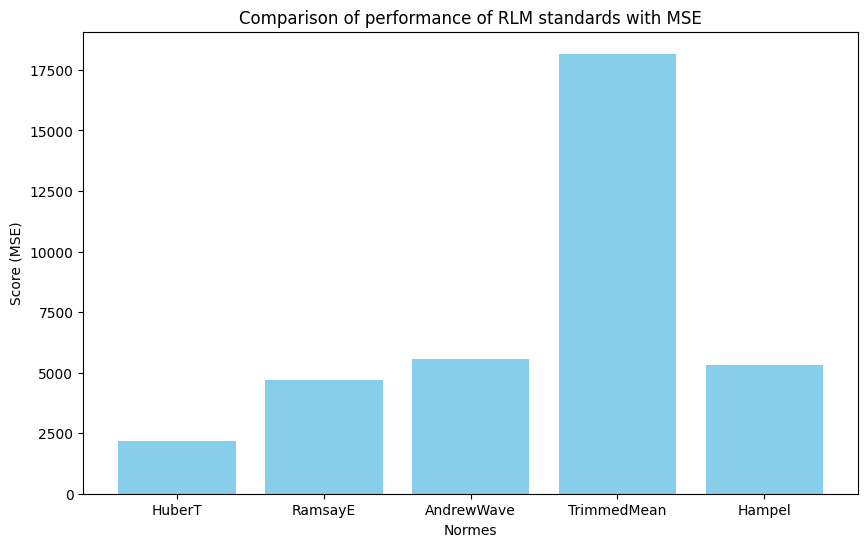

In [ ]:
from statsmodels.robust.norms import HuberT, RamsayE, AndrewWave, TrimmedMean, Hampel

def evaluate_model(y_true, y_pred, metric='mse'):
    if metric == 'mse':
        return mean_squared_error(y_true, y_pred)
    elif metric == 'mae':
        return mean_absolute_error(y_true, y_pred)

norms = [HuberT(), RamsayE(), AndrewWave(), TrimmedMean(), Hampel()]
norm_names = ['HuberT', 'RamsayE', 'AndrewWave', 'TrimmedMean', 'Hampel']

metric = 'mse'

scores = []
for norm in norms:
    model = sm.RLM(y_train, X_train, M=norm).fit()
    y_pred = model.predict(X_test)
    score = evaluate_model(y_test, y_pred, metric)
    scores.append(score)

plt.figure(figsize=(10, 6))
plt.bar(norm_names, scores, color='skyblue')
plt.xlabel('Normes')
plt.ylabel('Score ({})'.format(metric.upper()))
plt.title('Comparison of performance of RLM standards with {}'.format(metric.upper()))
plt.show()

#Baseline

In [ ]:
# Function to create input sequences
def create_sequences(data, seq_length=6):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length, 0]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

def baseline_model(sequences):
  list_pred=[]
  for sequence in sequences:
    pred=sequence[-1][0]
    list_pred.append(pred)

  return list_pred

In [ ]:
sequences, targets = create_sequences(dataframe_external_global_actor["PriceUSD"].to_numpy().reshape(dataframe_external_global_actor["PriceUSD"].to_numpy().shape[0],1), 6)

split_idx = int(0.8 * len(sequences))
X_train, y_train = sequences[:split_idx], targets[:split_idx]
X_test, y_test = sequences[split_idx:], targets[split_idx:]

mean_squared_error: 217.01415097831944
mean_absolute_error: 10.484405894571088
r2 score: 0.9296901730193654


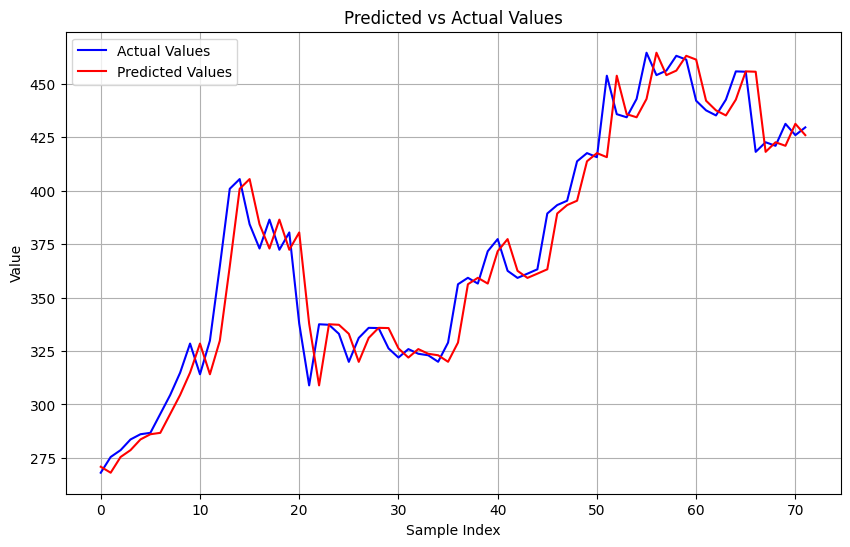

In [ ]:
predictions=baseline_model(X_test)
Performence_dict['Baseline'] = calculate_error(y_test, predictions)


plot_predictions_vs_actual(predictions, y_test)
#plot_overlapping_histogram(y_test, np.array(predictions))
#plot_mse_mae_boxplot(y_test, np.array(predictions))


# ARIMA

In [ ]:
data=dataframe_external_global_actor["PriceUSD"]
split_idx = int(0.8 * len(data))

X_train, real_test = data[split_idx-6:split_idx], data[split_idx:]
precedent=data[split_idx-1:len(data)-1]
real_test=list(real_test)

length_test=len(real_test)
list_pred=[]
list_model=[]

for i in range(length_test):
  model = auto_arima(X_train, seasonal=False)
  best_order = model.order
  list_model.append(best_order)
  forecast_steps = 1
  forecast = model.predict(n_periods=forecast_steps)
  list_pred.append(forecast.iloc[0])

  X_train= data[split_idx-6+i+1:split_idx+i+1]

mean_squared_error: 282.03551768153665
mean_absolute_error: 12.310486342983978
r2 score: 0.9114591823547463


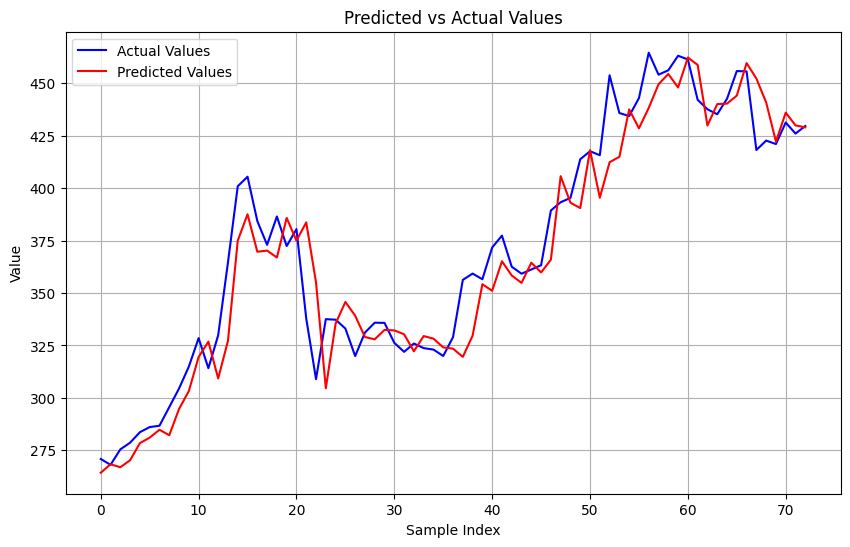

In [ ]:
Performence_dict['ARIMA'] = calculate_error(real_test, list_pred)

plot_predictions_vs_actual(list_pred, real_test)

# LSTM

In [ ]:
#liste_resultat.remove('PriceUSD')
#liste_resultat.remove('intercept')
liste_resultat.insert(0, 'PriceUSD')

list_test = liste_resultat
 #['PriceUSD']

In [ ]:
# Hyperparamètres
seq_length = 6
num_features = dataframe_external_global_actor.loc[:,list_test].shape[1]
num_units = 8

# Prétraitement
scaled_data = MinMaxScaler().fit_transform(dataframe_external_global_actor[list_test])
sequences, targets = create_sequences(scaled_data, seq_length)

split_idx = int(0.8 * len(sequences))
X_train_scaled, y_train_scaled = sequences[:split_idx], targets[:split_idx]
X_test_scaled, y_test_scaled = sequences[split_idx:], targets[split_idx:]

y_test = MinMaxScaler().fit(dataframe_external_global_actor[['PriceUSD']]).inverse_transform(y_test_scaled.reshape(-1, 1))

In [ ]:
X_train_scaled.shape

(286, 6, 29)

In [ ]:
y_train.shape

(286,)

In [ ]:
from tensorflow.keras.callbacks import Callback

class BestModel(Callback):
    def __init__(self):
        super(BestModel, self).__init__()
        self.best_val_loss = float('inf')
        self.best_model = None

    def on_epoch_end(self, epoch, logs=None):
        current_val_loss = logs.get('val_loss')
        if current_val_loss < self.best_val_loss:
            self.best_val_loss = current_val_loss
            self.best_model = self.model

# Modèle
model = Sequential()
model.add(LSTM(num_units, input_shape=(seq_length, num_features)))
model.add(Dropout(0.05))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
best_model_callback = BestModel()
history = model.fit(X_train_scaled, y_train_scaled, epochs=300, batch_size=16, validation_split=0.1, verbose=1, callbacks=[best_model_callback])

Epoch 1/300
17/17 [==============================] - 3s 40ms/step - loss: 0.0328 - val_loss: 0.0164
Epoch 2/300
17/17 [==============================] - 0s 6ms/step - loss: 0.0111 - val_loss: 0.0104
Epoch 3/300
17/17 [==============================] - 0s 6ms/step - loss: 0.0097 - val_loss: 0.0106
Epoch 4/300
17/17 [==============================] - 0s 7ms/step - loss: 0.0094 - val_loss: 0.0082
Epoch 5/300
17/17 [==============================] - 0s 8ms/step - loss: 0.0089 - val_loss: 0.0067
Epoch 6/300
17/17 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.0071
Epoch 7/300
17/17 [==============================] - 0s 8ms/step - loss: 0.0074 - val_loss: 0.0060
Epoch 8/300
17/17 [==============================] - 0s 7ms/step - loss: 0.0079 - val_loss: 0.0056
Epoch 9/300
17/17 [==============================] - 0s 8ms/step - loss: 0.0074 - val_loss: 0.0060
Epoch 10/300
17/17 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.0050
Epoch 11

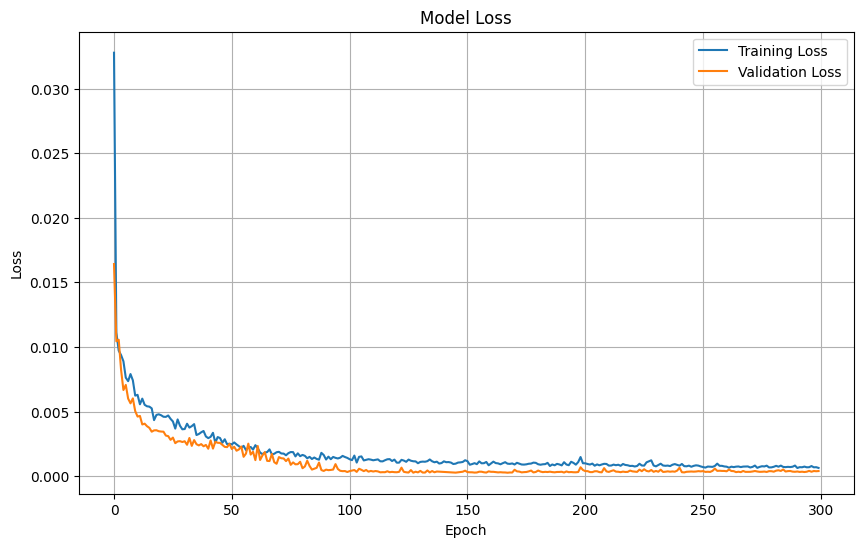

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)

mean_squared_error: 640.4703114067665
mean_absolute_error: 20.186690163001543
r2 score: 0.7924957585565849


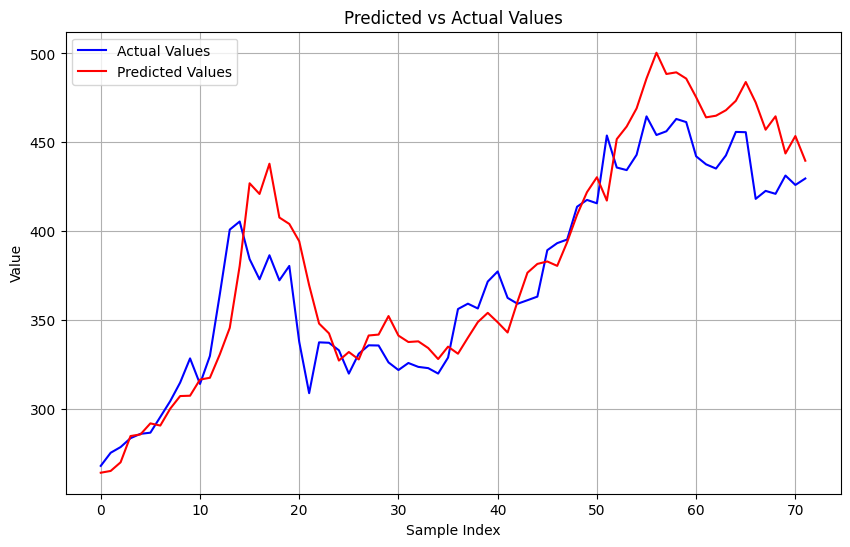

In [ ]:
best_model = best_model_callback.best_model
lstm_pred = best_model.predict(X_test_scaled, verbose=0)

y_test = MinMaxScaler().fit(dataframe_external_global_actor[['PriceUSD']]).inverse_transform(y_test_scaled.reshape(-1, 1))
lstm_pred = MinMaxScaler().fit(dataframe_external_global_actor[['PriceUSD']]).inverse_transform(lstm_pred)

Performence_dict['LSTM'] = calculate_error(y_test,lstm_pred)

plot_predictions_vs_actual(lstm_pred, y_test)

#Results Analysis

In [ ]:
Performence_dict

{'Linear Regression': (140.62176554150383,
  8.768283193165676,
  0.954440335064038),
 'Robust Linear Regression': (79.20123569467731,
  5.61603938543755,
  0.974339806168209),
 'Baseline': (217.01415097831944, 10.484405894571088, 0.9296901730193654),
 'ARIMA': (282.03551768153665, 12.310486342983978, 0.9114591823547463),
 'LSTM': (640.4703114067665, 20.186690163001543, 0.7924957585565849)}

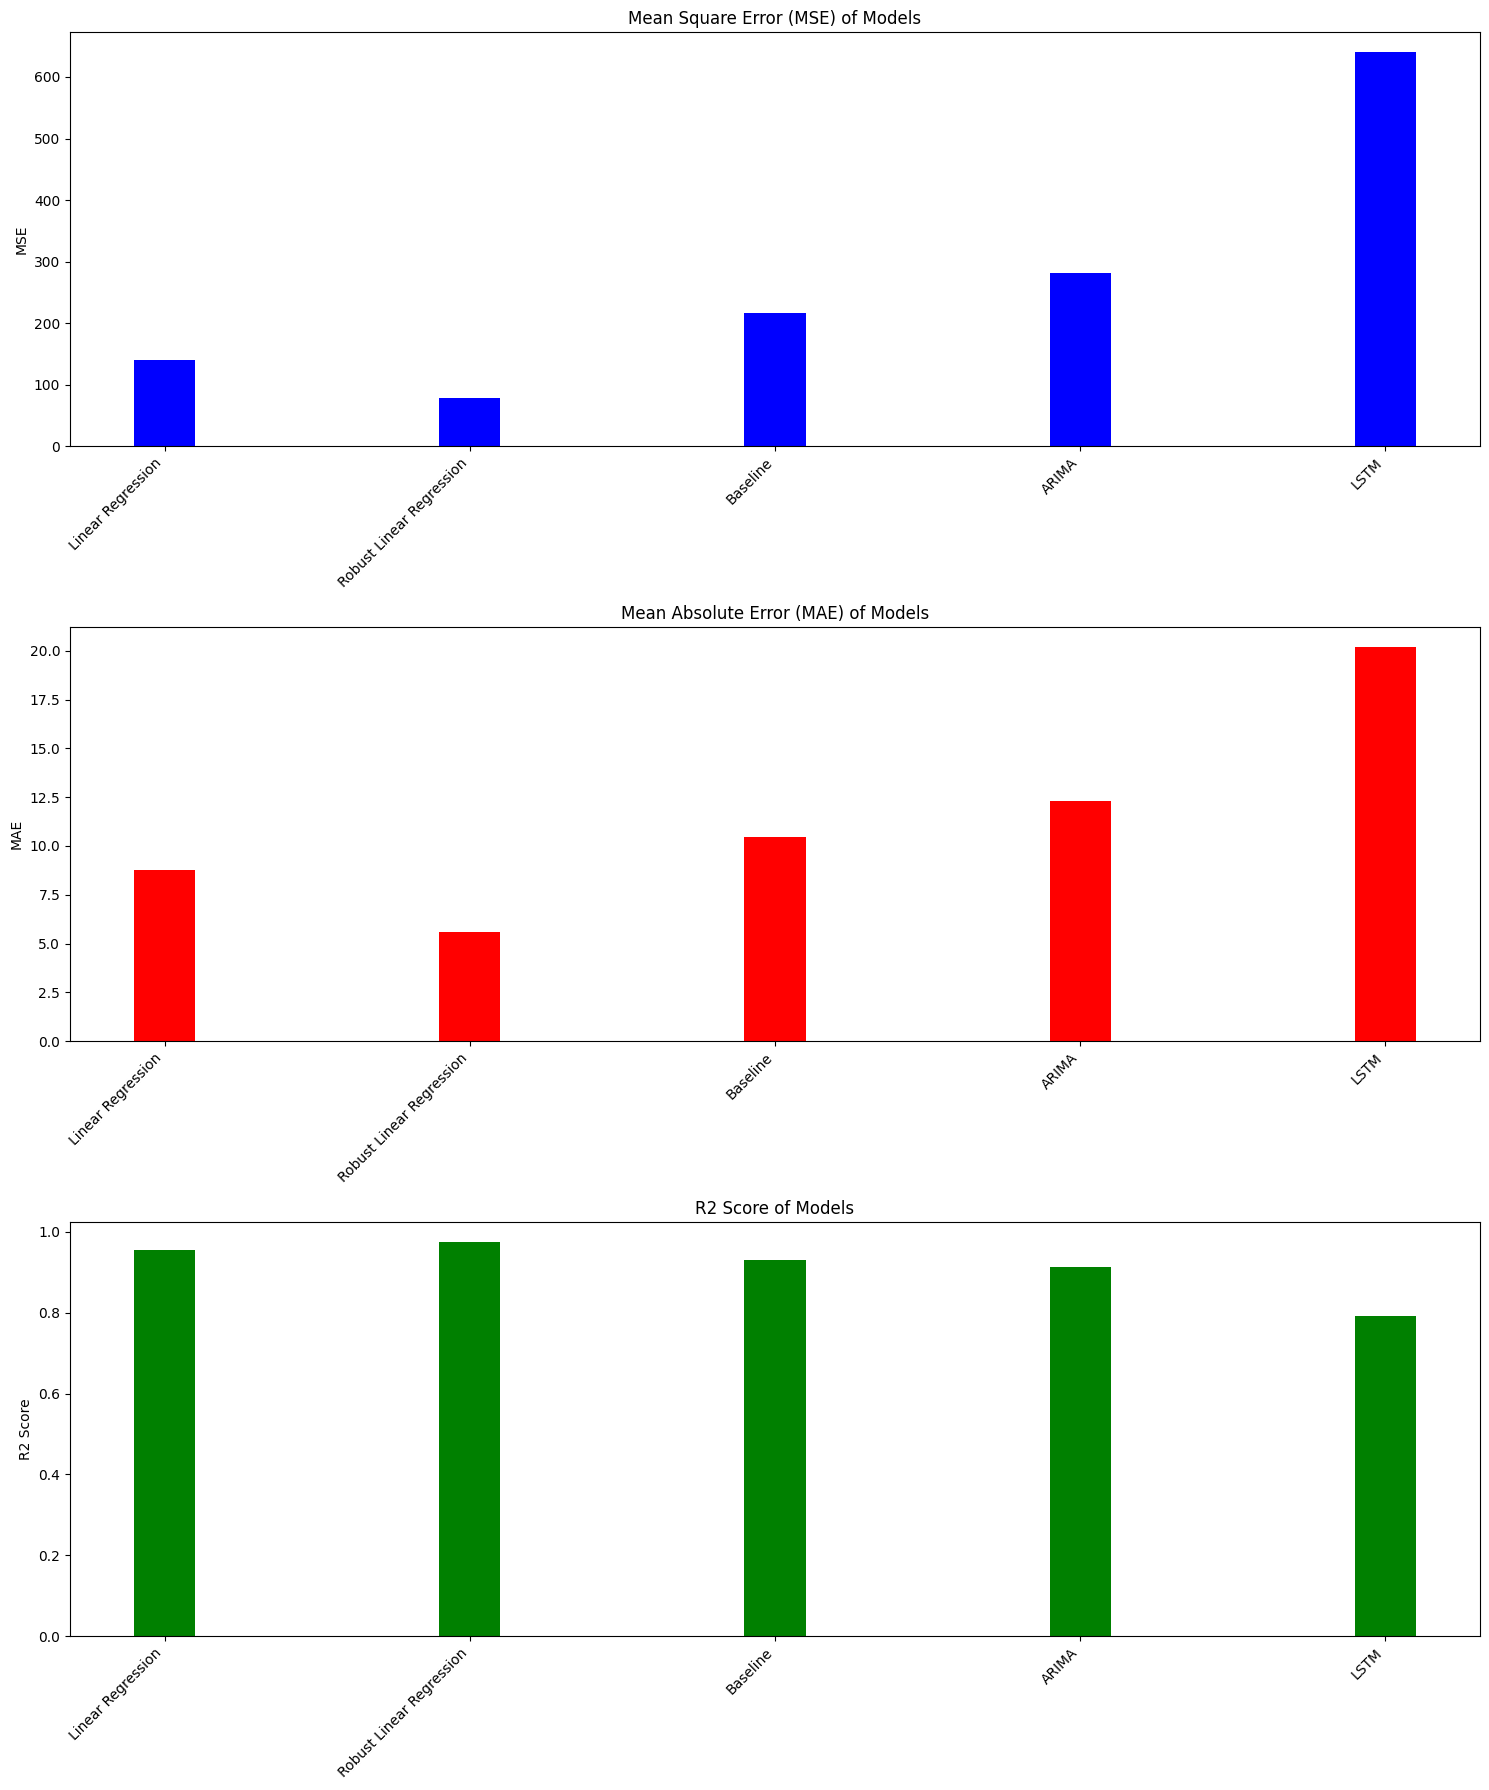

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15, 18))
mse = [Performence_dict[model][0] for model in Performence_dict]
mae = [Performence_dict[model][1] for model in Performence_dict]
r2 = [Performence_dict[model][2] for model in Performence_dict]
model_names = list(Performence_dict.keys())

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.2f}".format(y_value)

        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

# Définition de la largeur des barres
bar_width = 0.2  # Ajustez cette valeur pour changer la largeur des barres

# MSE Plot
ax[0].bar(model_names, mse, width=bar_width, color='b')  # Utilisez bar_width ici
ax[0].set_title('Mean Square Error (MSE) of Models')
ax[0].set_ylabel('MSE')
ax[0].set_xticks(range(len(model_names)))
ax[0].set_xticklabels(model_names, rotation=45, ha="right")

# MAE Plot
ax[1].bar(model_names, mae, width=bar_width, color='r')  # Et ici
ax[1].set_title('Mean Absolute Error (MAE) of Models')
ax[1].set_ylabel('MAE')
ax[1].set_xticks(range(len(model_names)))
ax[1].set_xticklabels(model_names, rotation=45, ha="right")

# R2 Score Plot
ax[2].bar(model_names, r2, width=bar_width, color='g')  # Et également ici
ax[2].set_title('R2 Score of Models')
ax[2].set_ylabel('R2 Score')
ax[2].set_xticks(range(len(model_names)))
ax[2].set_xticklabels(model_names, rotation=45, ha="right")

# Ajustement du layout
plt.tight_layout()

# Affichage du graphique
plt.show()